In [1]:
from attack import attack
from phase_search import phase_search
from get_mask import get_mask

import numpy as np
import matplotlib.pyplot as plt
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet50 import decode_predictions
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
model = ResNet50V2(weights='imagenet')
image_size = 224

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



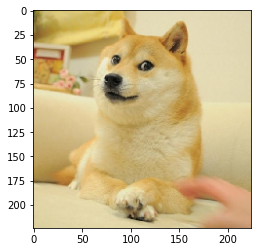

In [3]:
ori_img_path = "./doge.png"
ori_img = image.load_img(path=ori_img_path, target_size=(image_size, image_size))
ori_img_arr = image.img_to_array(ori_img)
ori_img_arr /= 255
prob_ori = model.predict(np.expand_dims(ori_img_arr, axis=0))
ori_img_label = np.argmax(prob_ori)
plt.imshow(ori_img_arr)

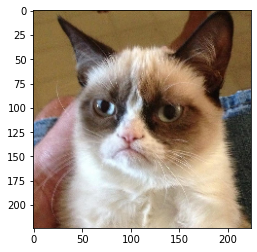

In [4]:
tgt_img_path = "./cat.png"
tgt_img = image.load_img(path=tgt_img_path, target_size=(image_size, image_size))
tgt_img_arr = image.img_to_array(tgt_img)
tgt_img_arr /= 255
prob_tgt = model.predict(np.expand_dims(tgt_img_arr, axis=0))
tgt_img_label = np.argmax(prob_tgt)
plt.imshow(tgt_img_arr)
target_label = tgt_img_label

In [5]:
print("ori_img_label: ", decode_predictions(prob_ori, top=1)[0])
print("tgt_img_label: ", decode_predictions(prob_tgt, top=1)[0])

ori_img_label:  [('n02113023', 'Pembroke', 0.4568863)]
tgt_img_label:  [('n02123597', 'Siamese_cat', 0.88002145)]


mid:  0.5
tmp_label:  [('n04589890', 'window_screen', 0.16568959)]
mid:  0.25
tmp_label:  [('n02123597', 'Siamese_cat', 0.9971534)]
mid:  0.375
tmp_label:  [('n02125311', 'cougar', 0.4545651)]
mid:  0.3125
tmp_label:  [('n02123597', 'Siamese_cat', 0.9907417)]
mid:  0.34375
tmp_label:  [('n02123597', 'Siamese_cat', 0.97589684)]
mid:  0.359375
tmp_label:  [('n02123597', 'Siamese_cat', 0.87615997)]
mid:  0.3671875
tmp_label:  [('n02123597', 'Siamese_cat', 0.705378)]
mid:  0.37109375


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tmp_label:  [('n02123597', 'Siamese_cat', 0.5673719)]


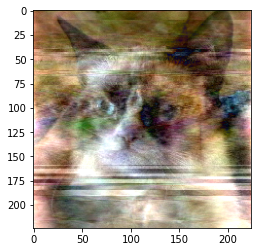

In [6]:
tgt_img_arr_shifted, flag = phase_search(ori_img_arr, tgt_img_arr, model, label=tgt_img_label)
plt.imshow(tgt_img_arr_shifted)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


284
try alpha 0.05
tmp_label:  [('n02123597', 'Siamese_cat', 0.59122676)]
try alpha 0.1
tmp_label:  [('n02125311', 'cougar', 0.40743923)]
alpha is 0.05000000000000002



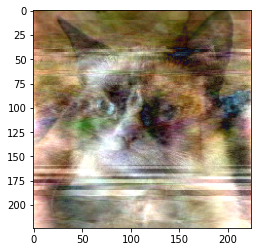

In [7]:
gama = 0.05
mask = get_mask(ori_img_arr, gama)
alpha = 0.05
left = tgt_img_arr_shifted
right = ori_img_arr
tmp_label = target_label
print(target_label)
while tmp_label == target_label and alpha <= 0.5:
    print("try alpha {}".format(alpha))
    tmp_img_arr_projected = (1 - mask) * (alpha * right + (1 - alpha) * left) + mask * left
    alpha += 0.05
    prob_target = model.predict(np.expand_dims(tmp_img_arr_projected, axis=0))
    tmp_label = np.argmax(prob_target)
    print("tmp_label: ", decode_predictions(prob_target, top=1)[0])
    left = tmp_img_arr_projected
target_label = tgt_img_label
alpha -= 0.1
print("alpha is {}\n".format(alpha))
tgt_img_arr_projected = (1 - mask) * (alpha * ori_img_arr + (1 - alpha) * tgt_img_arr_shifted) + mask * tgt_img_arr_shifted
plt.imshow(tgt_img_arr_projected)

In [8]:
init_num_evals = 100
max_num_evals = 1e4
adv_img_hsja = attack(
    model,
    ori_img_arr,
    method="hsja",
    mask=None,
    clip_max=1,
    clip_min=0,
    num_iterations=100,
    gamma=1.0,
    target_label=target_label,
    target_image=tgt_img_arr,
    max_num_evals=max_num_evals,
    init_num_evals=init_num_evals,
    image_size=image_size,
    max_query=8000,)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /mnt/data/files/vis/py-vis/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
original label:  [('n02113023', 'Pembroke', 0.4568863)]
target image label:  [('n02123597', 'Siamese_cat', 0.88002145)]


/mnt/data/files/idba-tifs/ImperceptibleAttack/attack.py:113: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim_j = compare_ssim(sample, perturbed, data_range=1, multichannel=True)
/mnt/data/files/idba-tifs/ImperceptibleAttack/attack.py:114: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr_j = compare_psnr(sample, perturbed, data_range=1)


iter: 1, q: 156, ssim: 0.5671, psnr: 15.7843, fsim: 0.8138, lpips: 0.2503, dist: 63.0368
iter: 2, q: 326, ssim: 0.4818, psnr: 16.2475, fsim: 0.8045, lpips: 0.2588, dist: 59.7632
iter: 3, q: 528, ssim: 0.4370, psnr: 16.3740, fsim: 0.7928, lpips: 0.2695, dist: 58.8990
iter: 4, q: 757, ssim: 0.4191, psnr: 16.5892, fsim: 0.7892, lpips: 0.2726, dist: 57.4576
iter: 5, q: 1008, ssim: 0.3607, psnr: 16.7795, fsim: 0.7662, lpips: 0.3029, dist: 56.2124
iter: 6, q: 1280, ssim: 0.3385, psnr: 17.0831, fsim: 0.7588, lpips: 0.3091, dist: 54.2816
iter: 7, q: 1572, ssim: 0.3508, psnr: 17.8793, fsim: 0.7725, lpips: 0.2986, dist: 49.5272
iter: 8, q: 1881, ssim: 0.2608, psnr: 17.3122, fsim: 0.7117, lpips: 0.3644, dist: 52.8686
iter: 9, q: 2209, ssim: 0.2676, psnr: 17.6662, fsim: 0.7192, lpips: 0.3513, dist: 50.7574
iter: 10, q: 2552, ssim: 0.2959, psnr: 18.9444, fsim: 0.7491, lpips: 0.3292, dist: 43.8115
iter: 11, q: 2910, ssim: 0.3218, psnr: 20.0904, fsim: 0.7739, lpips: 0.2936, dist: 38.3962
iter: 12, q:

In [9]:
from resize_generator import ResizeGenerator
rv_generator = ResizeGenerator(factor=4.0)
init_num_evals = 100
max_num_evals = 1e4
adv_img_qeba = attack(
    model,
    ori_img_arr,
    method="qeba",
    mask=None,
    clip_max=1,
    clip_min=0,
    num_iterations=100,
    gamma=1.0,
    target_label=target_label,
    target_image=tgt_img_arr,
    max_num_evals=max_num_evals,
    init_num_evals=init_num_evals,
    image_size=image_size,
    max_query=8000,
    rv_generator=rv_generator,)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /mnt/data/files/vis/py-vis/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
original label:  [('n02113023', 'Pembroke', 0.4568863)]
target image label:  [('n02123597', 'Siamese_cat', 0.88002145)]
iter: 1, q: 156, ssim: 0.6171, psnr: 15.9589, fsim: 0.8154, lpips: 0.2357, dist: 61.7826
iter: 2, q: 326, ssim: 0.5421, psnr: 16.0659, fsim: 0.7960, lpips: 0.2244, dist: 61.0258
iter: 3, q: 528, ssim: 0.5057, psnr: 16.0754, fsim: 0.7833, lpips: 0.2211, dist: 60.9591
iter: 4, q: 757, ssim: 0.5100, psnr: 16.4989, fsim: 0.7897, lpips: 0.2174, dist: 58.0583
iter: 5, q: 1009, ssim: 0.5613, psnr: 17.7035, fsim: 0.8157, lpips: 0.1868, dist: 50.5398
iter: 6, q: 1282, ssim: 0.5602, psnr: 18.0063, fsim: 0.8184, lpips: 0.1805, dist: 48.8082
iter: 7, q: 1575, ssim: 0.5884, psnr: 18.8458, fsim: 0.8323, lpips: 0.1586, dist: 44.3115
iter: 8, q: 1886, ssim: 0.6187, psnr: 19.7181, fsim: 0.8474, lpips: 0.1450, dis

In [10]:
init_num_evals = int(80 * np.count_nonzero(mask) / (image_size * image_size * 3) + 20)
max_num_evals = 1e4
adv_img_idba = attack(
    model,
    ori_img_arr,
    mask=mask,
    method='idba',
    clip_max=1,
    clip_min=0,
    num_iterations=100,
    gamma=1.0,
    target_label=target_label,
    target_image=tgt_img_arr_projected,
    max_num_evals=max_num_evals,
    init_num_evals=init_num_evals,
    image_size=image_size,
    max_query=8000,)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /mnt/data/files/vis/py-vis/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
original label:  [('n02113023', 'Pembroke', 0.4568863)]
target image label:  [('n02123597', 'Siamese_cat', 0.59122676)]
iter: 1, q: 99, ssim: 0.2721, psnr: 11.4243, fsim: 0.7106, lpips: 0.3333, dist: 104.1347
iter: 2, q: 180, ssim: 0.2714, psnr: 11.5029, fsim: 0.7109, lpips: 0.3328, dist: 103.1959
iter: 3, q: 268, ssim: 0.2797, psnr: 11.7923, fsim: 0.7154, lpips: 0.3339, dist: 99.8147
iter: 4, q: 364, ssim: 0.2792, psnr: 11.8039, fsim: 0.7154, lpips: 0.3376, dist: 99.6814
iter: 5, q: 464, ssim: 0.2958, psnr: 12.1538, fsim: 0.7222, lpips: 0.3334, dist: 95.7454
iter: 6, q: 570, ssim: 0.3074, psnr: 12.3670, fsim: 0.7273, lpips: 0.3309, dist: 93.4241
iter: 7, q: 680, ssim: 0.3551, psnr: 13.2346, fsim: 0.7464, lpips: 0.3232, dist: 84.5435
iter: 8, q: 794, ssim: 0.3898, psnr: 13.8486, fsim: 0.7592, lpips: 0.3172, dist: 

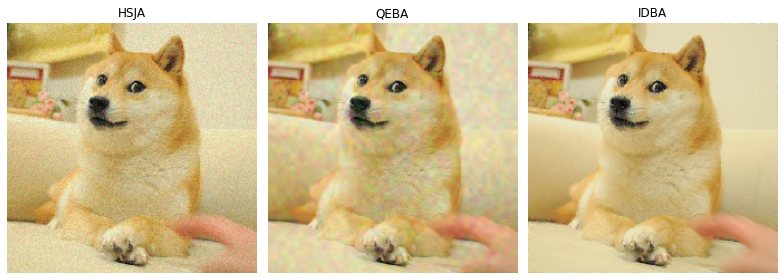

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(11, 5))
axs[0].imshow(adv_img_hsja)
axs[0].set_title('HSJA')
axs[0].axis('off')
axs[1].imshow(adv_img_qeba)
axs[1].set_title('QEBA')
axs[1].axis('off')
axs[2].imshow(adv_img_idba)
axs[2].set_title('IDBA')
axs[2].axis('off')
plt.tight_layout()
plt.show()